# Creating Spatial Dataframes (3)
ENV 859 - Fall 2022  
© John Fay, Duke University

## Lesson 3. Creating spatial dataframes from other file formats

Now we look at some formats that may be less familiar to you but are becoming more and more common. Again, we'll compare GeoPandas with the ArcGIS API for Python. 

### 3.1 Reading GeoJSON files
We have a GeoJSON format of the major river basins in NC saved in our data folder: `../data/12-Major_River_Basins.geojson` ([source](https://data-ncdenr.opendata.arcgis.com/datasets/ncdenr::major-river-basins/)). Let's see how we go about importing that file. 

>##### What is GeoJSON?
>GeoJSON is a text based format that stores spatial features in a long, but universally readable format (i.e. text!). "JSON" stands for JavaScript Object Notation, and if you look at raw JSON files from a Python perspective, it looks like a set of nested dictionary and list objects. We need not get too deep into that, but understand that being text based, JSON and its spatial counterpart GeoJSON, are used widely in web-based services and can be quite useful in certain circumstances.

#### Using GeoPandas
With GeoPandas, we read the GeoJSON file much like we did a shapefile, i.e. with the `read_file()` function. The key exception is that we specify the driver used to interpret the file. The default driver it would use is for Shapefiles, but here we spedcify the driver as `GeoJSON`.

In [1]:
#import geopandas
import geopandas as gpd

In [6]:
#read in the file 
gdf = gpd.read_file(
    filename='../data/Major_River_Basins.geojson',
    driver='GeoJSON')

In [7]:
#Explore...
gdf.head()

,FID,Basin,Sq_Miles,Acres,Name,PlanLink,SHAPE_Length,SHAPE_Area,geometry
0,1,BRD,1513.894812,9.688927e+05,Broad,https://deq.nc.gov/about/divisions/water-resou...,4.660031,0.388971,"MULTIPOLYGON (((-82.76957 35.06725, -82.76956 ..."
1,2,CAT,3285.405145,2.102659e+06,Catawba,https://deq.nc.gov/about/divisions/water-resou...,6.978237,0.846399,"MULTIPOLYGON (((-81.69406 36.14650, -81.69432 ..."
2,3,CHO,1298.283191,8.309012e+05,Chowan,https://deq.nc.gov/about/divisions/water-resou...,3.898689,0.337555,"MULTIPOLYGON (((-76.63823 36.54724, -76.63815 ..."
3,4,CPF,9163.594976,5.864701e+06,Cape Fear,https://deq.nc.gov/about/divisions/water-resou...,11.348849,2.349888,"MULTIPOLYGON (((-79.71241 36.35253, -79.71207 ..."
4,5,FBR,2828.806116,1.810436e+06,French Broad,https://deq.nc.gov/about/divisions/water-resou...,5.896702,0.729338,"MULTIPOLYGON (((-82.20824 36.15731, -82.20808 ..."


In [11]:
#Get the wkid 
gdf.crs.to_epsg()

4326

<AxesSubplot:>

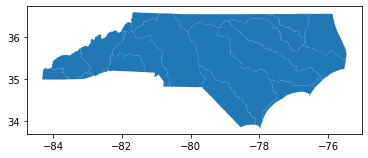

In [9]:
#Plot
gdf.plot()

#### Using the ArcGIS Python API
The ArcGIS Python API doesn't currently read GeoJSON. (I know, right?) But we could revert to importing as a geodataframe and then importing that...

In [13]:
from arcgis.features import GeoAccessor

In [14]:
sdf = GeoAccessor.from_geodataframe(gdf)

In [16]:
sdf.spatial.plot()

MapView(layout=Layout(height='400px', width='100%'))

### 3.2 Reading KML files
#### GeoPandas